### Python Setup

In [2]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# seaborn settings
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

### Data

In [4]:
# import data
ROOT = "https://raw.githubusercontent.com/kirenz/modern-statistics/main/data/"
DATA = "height.csv"

df = pd.read_csv(ROOT + DATA)

In [5]:
# show head of dataframe
df.head()

,name,id,height,average_height_parents,gender
0,Stefanie,1,162,161,female
1,Peter,2,163,163,male
2,Stefanie,3,163,163,female
3,Manuela,4,164,165,female
4,Simon,5,164,163,male


In [6]:
# show tail of dataframe
df.tail()

,name,id,height,average_height_parents,gender
15,Marc,16,166,166,male
16,Ralph,17,166,166,male
17,Tom,18,167,166,male
18,Steven,19,167,167,male
19,Emanuel,20,168,168,male


In [7]:
# data overview (metadata)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    20 non-null     object
 1   id                      20 non-null     int64 
 2   height                  20 non-null     int64 
 3   average_height_parents  20 non-null     int64 
 4   gender                  20 non-null     object
dtypes: int64(3), object(2)
memory usage: 928.0+ bytes


In [8]:
# show all variables
df.columns

Index(['name', 'id', 'height', 'average_height_parents', 'gender'], dtype='object')

### Tidying Data

In [9]:
# change data types
df["name"] = pd.Categorical(df["name"])
df["id"] = pd.Categorical(df["id"])
df["gender"] = pd.Categorical(df["gender"])

df.rename(columns = {
    "average_height_parents": "height_parents"},
    inplace=True
    )

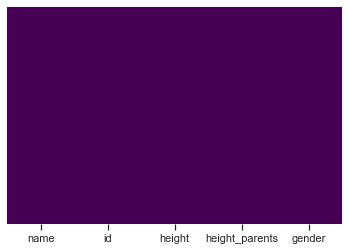

In [10]:
# show missing values (will be displayed in yellow)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis");

In [11]:
# check column-wise distribution of null values
print(df.isnull().sum())

name              0
id                0
height            0
height_parents    0
gender            0
dtype: int64
